# MobileNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert the images to 3 channels
x_train = tf.repeat(x_train[..., tf.newaxis], 3, axis=-1)
x_test = tf.repeat(x_test[..., tf.newaxis], 3, axis=-1)

# Resize the images to 32x32
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

# Preprocess the data
x_train = preprocess_input(x_train.numpy().astype('float32'))
x_test = preprocess_input(x_test.numpy().astype('float32'))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Load the MobileNet model without the top layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add the top layers for classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Define the full  pre trained model 
model_mobilenet = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False
    
model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_mobilenet.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))
score = model_mobilenet.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model_mobilenet)
tflite_model = converter.convert()

# Save the TFLite model to file
with open('model_mobilenet.tflite', 'wb') as f:
    f.write(tflite_model)


11490434/11490434 [==============================] - 0s 0us/step


17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/10
938/938 [==============================] - 239s 251ms/step - loss: 0.2616 - accuracy: 0.9169 - val_loss: 0.1838 - val_accuracy: 0.9420
Epoch 2/10
938/938 [==============================] - 213s 227ms/step - loss: 0.1424 - accuracy: 0.9539 - val_loss: 0.1500 - val_accuracy: 0.9514
Epoch 3/10
938/938 [==============================] - 214s 228ms/step - loss: 0.1130 - accuracy: 0.9635 - val_loss: 0.1424 - val_accuracy: 0.9535
Epoch 4/10
938/938 [==============================] - 201s 214ms/step - loss: 0.0945 - accuracy: 0.9695 - val_loss: 0.1426 - val_accuracy: 0.9551
Epoch 5/10
938/938 [==============================] - 214s 228ms/step - loss: 0.0793 - accuracy: 0.9744 - val_loss: 0.1376 - val_accuracy: 0.9564
Epoch 6/10
938/938 [==============================] - 201s 214ms/step - loss: 0.0663 - accuracy: 0.9782 - val_loss: 0.1360 - val_accuracy: 0.9583
Epoch 7/10
938/938 [==============================] - 214s 

In [ ]:
model_mobilenet.summary()

In [ ]:
import os
# Save the Keras model
model_mobilenet.save('model_mobilenet.h5')

model_size = os.path.getsize('model_mobilenet.h5')
print(f"Model size(MOBILENET): {model_size / (1024 * 1024):.2f} MB")
tflite_file = 'model_mobilenet.tflite'
size_in_bytes = os.path.getsize(tflite_file)
size_in_mb = size_in_bytes / (1024 * 1024)
print(f"Size of TFLite model(MOBILENET): {size_in_mb:.2f} MB")

Model size(MOBILENET): 14.09 MB
Size of TFLite model(MOBILENET): 12.71 MB


In [ ]:
import os

Size of TFLite model(MOBILENET): 12.71 MB


In [ ]:
model_mobilenet.save('/content/mobilenet.pb')

In [ ]:
import os
model_size_mobilenet = os.path.getsize('/content/mobilenet.pb/saved_model.pb')
print("Model size(MOBILENET): {:.2f} MB".format(model_size_mobilenet / (1024 * 1024)))

Model size(MOBILENET): 1.45 MB


313/313 [==============================] - 7s 21ms/step


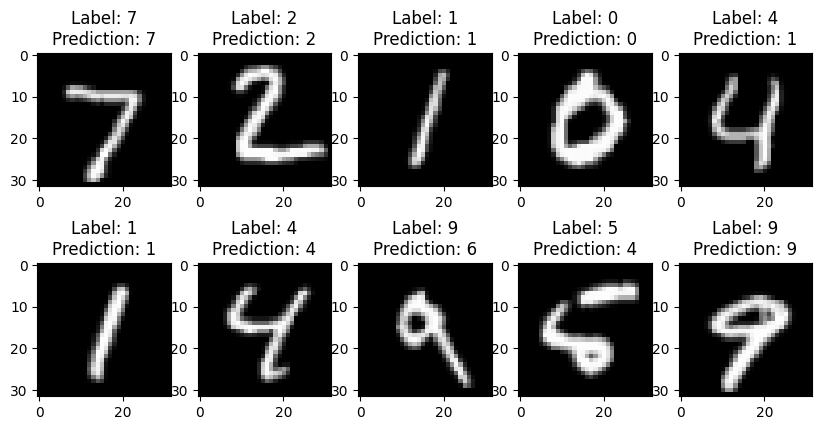

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_test_norm = (x_test - x_test.min()) / (x_test.max() - x_test.min())
y_pred = model_mobilenet.predict(x_test)
y_test_orig = np.argmax(y_test, axis=1)

# Show the first 10 images from the test set
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()
for i in range(10):
    img = x_test_norm[i]
    label = y_test_orig[i]
    pred_label = np.argmax(y_pred[i])
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Label: {label}\nPrediction: {pred_label}")
plt.show()


# VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert the images to 3 channels
x_train = tf.repeat(x_train[..., tf.newaxis], 3, axis=-1)
x_test = tf.repeat(x_test[..., tf.newaxis], 3, axis=-1)

# Resize the images to 32x32 to match the input size of VGG16
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

# Preprocess the data
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Load the VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add the top layers for classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Define the full model
model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_vgg16.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
score = model_vgg16.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model_vgg16)
tflite_model = converter.convert()

# Save the TFLite model to file
with open('vgg16.tflite', 'wb') as f:
    f.write(tflite_model)


58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.5068 - accuracy: 0.8802 - val_loss: 0.3500 - val_accuracy: 0.8958
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2410 - accuracy: 0.9252 - val_loss: 0.2198 - val_accuracy: 0.9320
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1975 - accuracy: 0.9372 - val_loss: 0.1775 - val_accuracy: 0.9444
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1735 - accuracy: 0.9439 - val_loss: 0.1682 - val_accuracy: 0.9447
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1571 - accuracy: 0.9491 - val_loss: 0.1650 - val_accuracy: 0.9481
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1455 - accuracy: 0.9522 - val_loss: 0.1687 - val_accuracy: 0.9459
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/

In [ ]:
import os
# Save the Keras model
model_mobilenet.save('model_mobilenet.h5')

model_vgg16.save('model_vgg16.h5')

model_size = os.path.getsize('model_vgg16.h5')
print(f"Model size(VGG16): {model_size / (1024 * 1024):.2f} MB")

tflite_file = 'vgg16.tflite'
size_in_bytes = os.path.getsize(tflite_file)
size_in_mb = size_in_bytes / (1024 * 1024)
print(f"Size of TFLite model(vgg16): {size_in_mb:.2f} MB")

Model size(VGG16): 56.98 MB
Size of TFLite model(vgg16): 56.40 MB


In [ ]:
import numpy as np
from PIL import Image

def preprocess_png(image_path, intensity=1.5):
    # Load the image and convert to grayscale
    img = Image.open(image_path).convert('L')
    
    # Invert the pixel values (black to white and white to black)
    img = ImageOps.invert(img)
    img = ImageEnhance.Brightness(img).enhance(intensity)
    img = img.resize((32, 32))
    img_arr = np.array(img)
    img_arr = np.stack((img_arr,) * 3, axis=-1)
    
    # # Subtract the ImageNet mean values from each channel
    # img_arr[:, :, 0] -= 0.485
    # img_arr[:, :, 1] -= 0.456
    # img_arr[:, :, 2] -= 0.406
    
    # # Divide each channel by the ImageNet standard deviation values
    # img_arr[:, :, 0] /= 0.229
    # img_arr[:, :, 1] /= 0.224
    # img_arr[:, :, 2] /= 0.225
    return img_arr


1/1 [==============================] - 0s 21ms/step


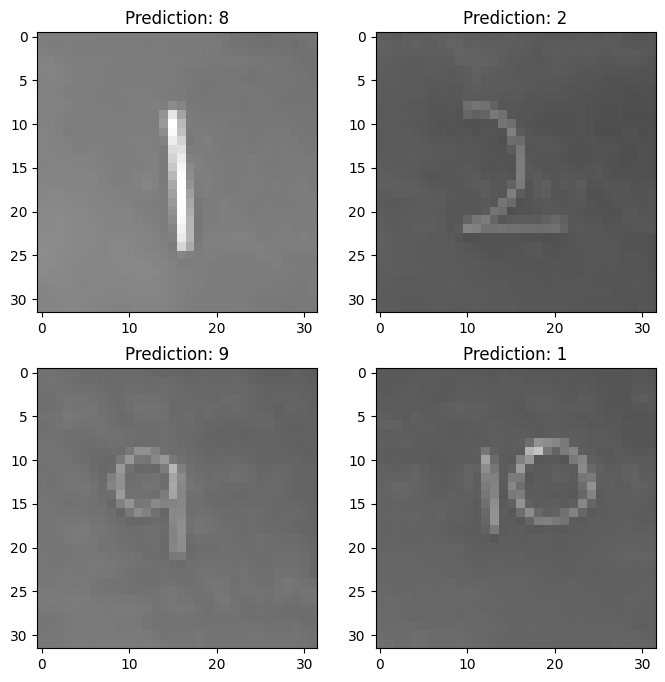

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

from PIL import Image, ImageEnhance
# Load the sample images
img1 = Image.open('number=1.jpg').convert('L')
img2 = Image.open('number=2.jpg').convert('L')
img3 = Image.open('number=9.jpg').convert('L')
img4 = Image.open('number=10.jpg').convert('L')

# Convert the images to numpy arrays and repeat grayscale channel three times to create RGB images
img1 = np.stack((np.array(img1),)*3, axis=-1)
img2 = np.stack((np.array(img2),)*3, axis=-1)
img3 = np.stack((np.array(img3),)*3, axis=-1)
img4 = np.stack((np.array(img4),)*3, axis=-1)

# Preprocess the images
img1 = tf.image.resize(img1, (32, 32))
img2 = tf.image.resize(img2, (32, 32))
img3 = tf.image.resize(img3, (32, 32))
img4 = tf.image.resize(img4, (32, 32))

img1 = preprocess_png("/content/number=1.jpg")
img2 = preprocess_png("/content/number=2.jpg")
img3 = preprocess_png("/content/number=9.jpg")
img4 = preprocess_png("/content/number=10.jpg")

# Predict the classes
pred1 = model_vgg16.predict(np.array([img1]))
pred2 = model_vgg16.predict(np.array([img2]))
pred3 = model_vgg16.predict(np.array([img3]))
pred4 = model_vgg16.predict(np.array([img4]))

# Get the predicted labels
label1 = np.argmax(pred1)
label2 = np.argmax(pred2)
label3 = np.argmax(pred3)
label4 = np.argmax(pred4)

# Show the images with predicted labels as titles
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes[0, 0].imshow(img1)
axes[0, 0].set_title(f"Prediction: {label1}")
axes[0, 1].imshow(img2)
axes[0, 1].set_title(f"Prediction: {label2}")
axes[1, 0].imshow(img3)
axes[1, 0].set_title(f"Prediction: {label3}")
axes[1, 1].imshow(img4)
axes[1, 1].set_title(f"Prediction: {label4}")
plt.show()


# PYTORCH_IMPLEMENTATION

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms,utils
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from tqdm.notebook import tqdm as tqdm
import seaborn as sns
import torch.nn.init as init
sns.set_theme()

In [ ]:
image_transformer = transforms.Compose([transforms.ToTensor(),
                                        transforms.GaussianBlur(kernel_size=(3,3))])
train_data = datasets.MNIST(root='data/', download=True, transform = image_transformer)
test_data = datasets.MNIST(root='data/', train=False, transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 153804676.93it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 98644701.81it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 59065252.90it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 19579166.26it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



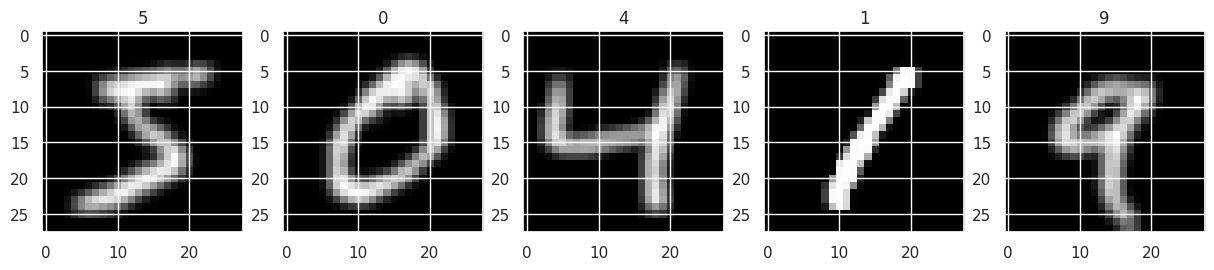

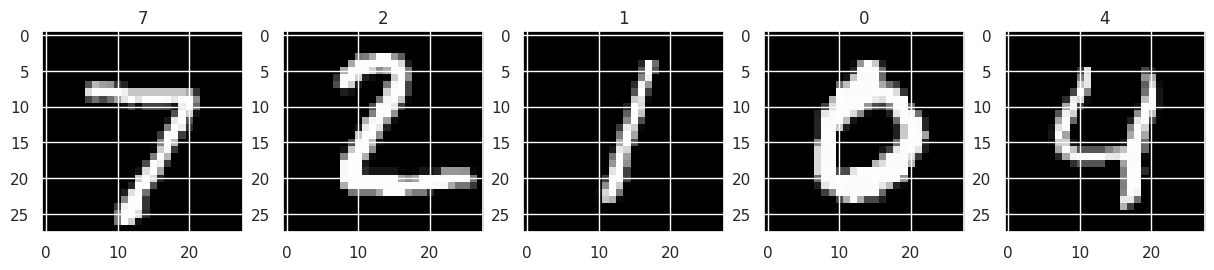

In [ ]:
import matplotlib.pyplot as plt

train_data = datasets.MNIST(root='data/', download=True, transform=image_transformer)
test_data = datasets.MNIST(root='data/', train=False, transform=transforms.ToTensor())

# Display a few sample images from the train set
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(train_data[i][0][0], cmap='gray')
    axs[i].set_title(train_data[i][1])

# Display a few sample images from the test set
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(test_data[i][0][0], cmap='gray')
    axs[i].set_title(test_data[i][1])

plt.show()


In [ ]:
torch.manual_seed(43)

val_size = int(0.2*len(train_data))
train_size = len(train_data) - val_size

# splitting data for training and validation
train_data, val_data = random_split(train_data, [train_size, val_size])
len(train_data), len(val_data)

(48000, 12000)

In [ ]:
# 128 images in each batch
batch_size = 128

train_loader = DataLoader(train_data, batch_size, shuffle=True, num_workers=1, pin_memory=True)
val_loader = DataLoader(val_data, batch_size, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_data, batch_size, num_workers=2, pin_memory=True)

In [ ]:
# funciton to evaluate the model 
def evaluate_CNN(model, testloader,batch_size=128):
    with torch.no_grad():
        val_loss, val_acc = 0.0, 0.0
        for val_batch in testloader:
            imgs, targets = val_batch
            imgs, targets = imgs.to(device), targets.to(device).long()
            val_outputs = model(imgs)
            val_loss += torch.nn.functional.cross_entropy(val_outputs, targets).item()
            val_preds = torch.argmax(val_outputs, dim=1)
            val_acc += torch.sum(val_preds == targets)
    val_acc = float(float(val_acc) / float(len(testloader)*float(batch_size)))
    return val_acc

In [ ]:
# function to train the Neural network
def train_CNN(model,optimizer,train_loader,val_loader,epochs):
  acc_vals = []
  for epoch in range(epochs):
    train_loss, train_acc = 0, 0
    print("\nEpoch: ", str(epoch+1), "/", str(epochs))

    with tqdm(total=len(train_loader)) as pbar:
        model.train()
        for idx, batch in enumerate(train_loader):
        
            images, labels = batch
            images, labels = images.to(device), labels.to(device).long()
            
            # forward propagation
            preds = model(images)
            loss = torch.nn.functional.cross_entropy(preds, labels)
            optimizer.zero_grad()
            
            # backward propagation
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            acc = torch.sum(torch.argmax(preds, dim=1) == labels)
            train_acc += acc
            pbar.set_postfix(Loss='{0:.4f}'.format(loss.item()),
                             Accuracy='{0:.4f}'.format(float(train_acc.item()/(float(batch_size)*(idx+1)))))
            pbar.update(1)
            
        # calculating train and validation accuracies
        model.eval()
        val_acc = evaluate_CNN(model, val_loader)
        train_acc = round(float(float(train_acc)/float(len(train_loader)*float(batch_size))), 4)
        acc_vals.append(train_acc)
        print("train_acc:", train_acc, " val_acc:", round(val_acc, 4))
  return acc_vals

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [ ]:
import torch.optim as optim
from torchvision.models import mobilenet_v2
# Load the MobileNet model pre-trained on ImageNet
model1 = mobilenet_v2(pretrained=True)

# Modify the input and output layers of the model to match the MNIST dataset
model1.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
model1.classifier[1] = nn.Linear(1280, 10)

# Move the model to the device
model1.to(device)

optimizer = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)

acc_vals1 = train_CNN(model1,optimizer,train_loader,val_loader,epochs = 5)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 117MB/s]



Epoch:  1 / 5


  0%|          | 0/375 [00:00<?, ?it/s]

train_acc: 0.8955  val_acc: 0.968

Epoch:  2 / 5


  0%|          | 0/375 [00:00<?, ?it/s]

train_acc: 0.9751  val_acc: 0.9768

Epoch:  3 / 5


  0%|          | 0/375 [00:00<?, ?it/s]

train_acc: 0.9829  val_acc: 0.9829

Epoch:  4 / 5


  0%|          | 0/375 [00:00<?, ?it/s]

train_acc: 0.9873  val_acc: 0.982

Epoch:  5 / 5


  0%|          | 0/375 [00:00<?, ?it/s]

train_acc: 0.9891  val_acc: 0.9825


In [ ]:
!pip install onnx
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 90.3 MB/s eta 0:00:00
